# Visualize GMM Distributions

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch
from collections import defaultdict, Counter
import random
import pickle
import itertools

import src.anomaly_model
import src.sent_encoder

%matplotlib inline
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## Load data

In [2]:
with open('../data/bnc.pkl', 'rb') as f:
  bnc_sentences = pickle.load(f)

random.seed(12345)
bnc_sentences = random.sample(bnc_sentences, 50)

In [3]:
enc = src.sent_encoder.SentEncoder()

## Plot PCA

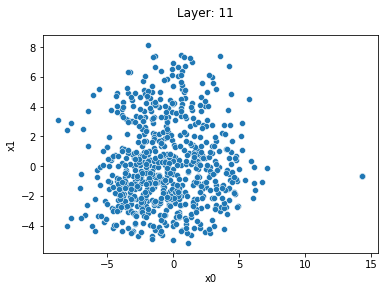

In [6]:
import sklearn.decomposition

#for LAYER in range(13):
for LAYER in [11]:
  tokens, vecs = enc.contextual_token_vecs(bnc_sentences)
  tokens = list(itertools.chain(*tokens))
  vecs = np.vstack(vecs)[:, LAYER, :]
  
  pca = sklearn.decomposition.PCA(n_components=2)
  vecs_pca = pca.fit_transform(vecs)
  vecs_pca_df = pd.DataFrame({'token': tokens, 'x0': vecs_pca[:,0], 'x1': vecs_pca[:,1]})
  #vecs_pca_df = vecs_pca_df[vecs_pca_df.token != '.']

  plot = sns.scatterplot(data=vecs_pca_df, x='x0', y='x1')
  plt.suptitle(f"Layer: {LAYER}")
  plt.show()

## What are outliers?

In [8]:
vecs_pca_df[vecs_pca_df.x0 > 10].head(10)

,token,x0,x1
21,.,14.326396,-0.674733
31,.,14.290154,-0.678747
41,.,14.323945,-0.675523
70,.,14.304636,-0.669349
90,.,14.301304,-0.670158
99,.,14.305621,-0.667212
106,.,14.310216,-0.674339
151,.,14.312235,-0.671845
170,.,14.291231,-0.674246
208,.,14.299092,-0.675063
